<h2 style="color:green" align="center">Machine Learning With Python: Linear Regression With One Variable</h2>

# What is Linear Regression?

Linear regression is a simple and widely used machine learning algorithm that predicts a continuous output (numerical value) based on input features. It assumes a linear relationship between the input variables (independent variables) and the output variable (dependent variable).

**Key Idea**
The goal of linear regression is to find the best-fitting straight line (called the regression line) that represents the relationship between the variables. This line is represented by the equation:

y=mx+c

Where:

* y: Predicted value (output)
* x: Input feature (independent variable)
* y changes when x changes)
* c: Intercept (the value of y when 𝑥=0)

In case of multiple features, the equation becomes: 

$$y = w_1 x_1 + w_2 x_2 + \ldots + w_n x_n + b$$


# How It Works

* Input Data: You provide input features and corresponding output values (training data).
* Fit the Line: The algorithm finds the line that minimizes the difference between the actual and predicted values. This is done using a method called Least Squares, which minimizes the sum of squared errors.
* Prediction: Once the line is learned, you can use it to predict  𝑦 for new 𝑥 values.

# Example in Simple Words
Imagine you run a lemonade stand and want to predict your daily sales (𝑦) based on the temperature (𝑥):

Data:
* On a 30°C day, you sell 50 cups.
* On a 35°C day, you sell 70 cups.
* On a 40°C day, you sell 90 cups.

Linear regression analyzes this data and fits a straight line. Using the equation of the line, it might predict that on a 38°C day, you'll sell about 82 cups of lemonade.

**Applications**

* Predicting house prices based on size, location, etc.
* Estimating sales based on advertising budget.
* Forecasting stock prices or trends.

<h3 style="color:purple">Sample problem of predicting home price in monroe, new jersey (USA)</h3>

Below table represents current home prices in monroe township based on square feet area, new jersey

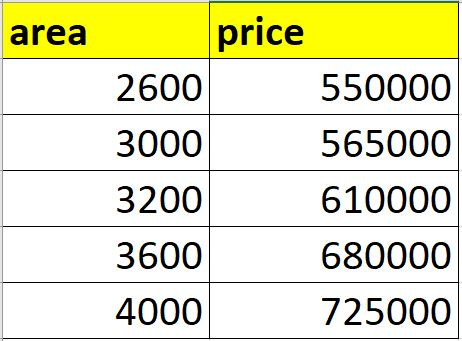

**Problem Statement**: Given above data build a machine learning model that can predict home prices based on square feet area


You can represent values in above table as a scatter plot (values are shown in red markers). After that one can draw a straight line that best fits values on chart. 

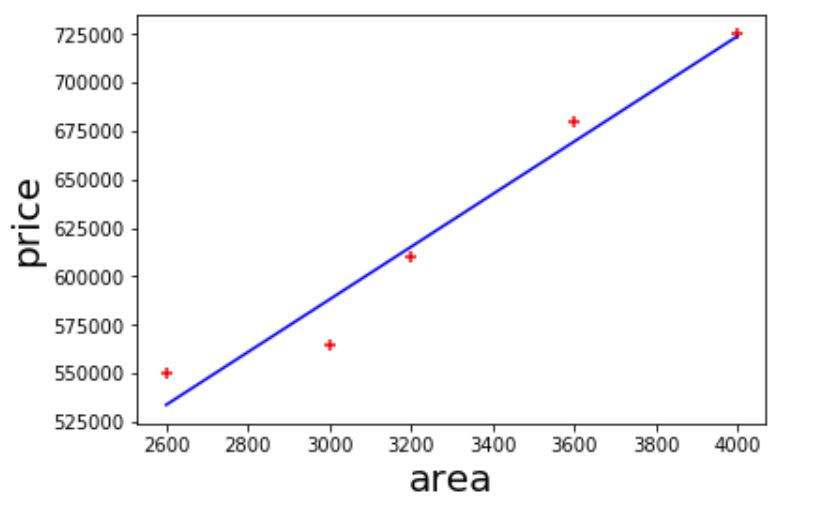

You can draw multiple lines like this but we choose the one where total sum of error is minimum

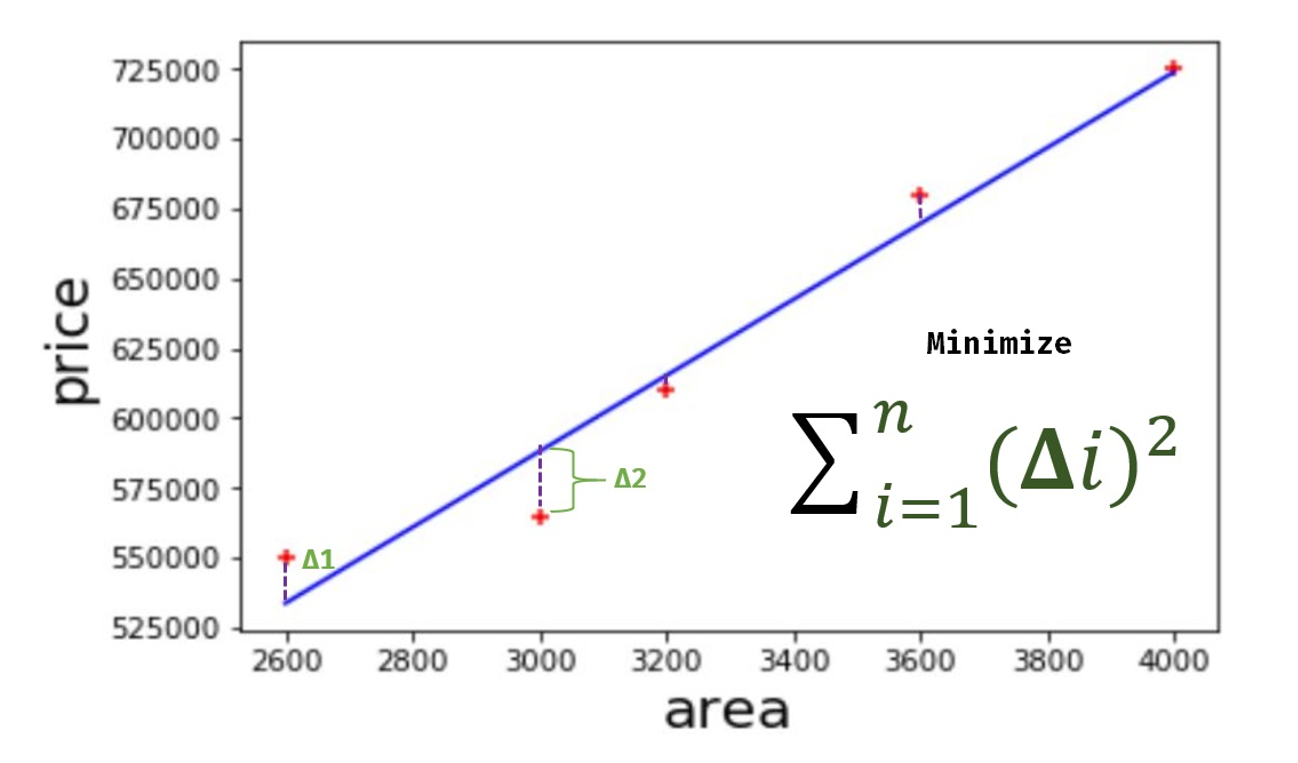

You might remember about linear equation from your high school days math class. Home prices can be presented as following equation,

home price = m * (area) + b

Generic form of same equation is,

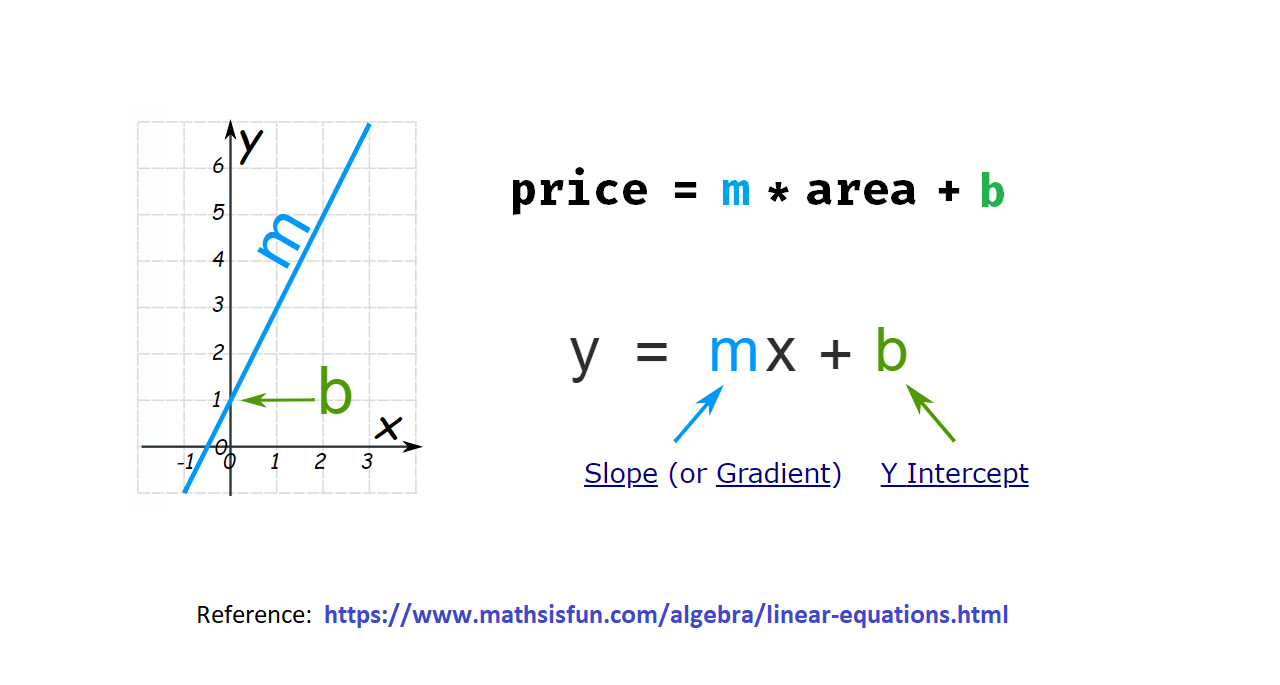

In [5]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('homeprices.csv')
df

area   price
0  2600  550000
1  3000  565000
2  3200  610000
3  3600  680000
4  4000  725000

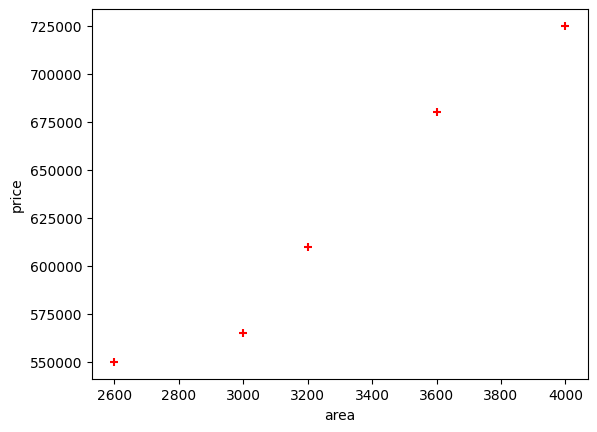

In [7]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

In [8]:
new_df = df.drop('price',axis='columns')
new_df

area
0  2600
1  3000
2  3200
3  3600
4  4000

In [9]:
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [10]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

LinearRegression()

**(1) Predict price of a home with area = 3300 sqr ft**

In [11]:
reg.predict([[3300]])

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [13]:
reg.intercept_

180616.43835616432

**Y = m * X + b (m is coefficient and b is intercept)**

In [14]:
3300*135.78767123 + 180616.43835616432

628715.7534151643

**(1) Predict price of a home with area = 5000 sqr ft**

In [15]:
reg.predict([[5000]])

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

<h3 style="color:purple">Generate CSV file with list of home price predictions</h3>

In [16]:
area_df = pd.read_csv("areas.csv")
area_df.head()

area
0  1274
1  1500
2  2300
3  3540
4  4120

In [17]:
p = reg.predict(area_df)
p

array([ 353609.93150685,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [18]:
area_df['prices']=p
area_df

area        prices
0   1274  3.536099e+05
1   1500  3.842979e+05
2   2300  4.929281e+05
3   3540  6.613048e+05
4   4120  7.400616e+05
5   4560  7.998082e+05
6   5490  9.260908e+05
7   3460  6.504418e+05
8   4750  8.256079e+05
9   2300  4.929281e+05
10  9000  1.402705e+06
11  8600  1.348390e+06
12  7100  1.144709e+06

In [20]:
area_df.to_csv("prediction.csv")